# Data Preprocessing Steps 
1. Importing the libraries (Compulsory)
2. Importing the dataset (Compulsory)
3. Taking case of missing values (Optional)
4. Encoding categorical data (Optional)
5. Splitting the dataset into training and testing sets (Compulsory)
6. Feature Scaling (Optional)

# Data Preprocessing Tools

## Importing the libraries (compulsory)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset (compulsory)

In [2]:
dataset = pd.read_csv('Data.csv') #this creates a dataframe

In [3]:
X = dataset.iloc[:, :-1].values #X is the matrix of features (independent variables)
y = dataset.iloc[:, -1].values #y is the dependent variable vector
#in our dataset, y is the "Purchased" column
#X will have data of all rows for all columns except "Purchased"
#.values will give us a numpy array

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data - optional, case by case

In [6]:
#one approach to taking care of missing data is to delete the observation entirely
#while this can work in large datasets where the number of missing data amounts to say 1% of the dataset 
#we can't take this approach when there are a lot of missing data as doing so will affect the quality of our learning model
#one way to handle it is to replace the missing data with the average of the column
from sklearn.impute import SimpleImputer

In [7]:
#create an instance/object of the class 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#np.nan refer to all missing/empty values in the feature matrix X

In [8]:
#apply imputer object on matrix of features X using fit (which looks for missing values)
#fit expects all numerical columns 
#include all numerical columns just to be safe
imputer.fit(X[:, 1:3]) #fit imputer on X (calculate mean)
#to perform the replacements, we need to use transform (apply transformation)
X[:, 1:3] = imputer.transform(X[:, 1:3]) #impute all missing values in X and assign it back to X

In [9]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data (helpful in correlation analysis) - optional, case by case

### Encoding the Independent Variable

Problems of encoding the countries as 0,1,2 (Label encoding):
Learning model might misintepret that there is a numerical order or that the order matters (that there exists some hierarchy in the values like 0 < 1 < 2), leading to misinterpreted correlations. A better way to encode is using One-Hot Encoding where categorical variables are represented as binary vectors. Each country will have a binary vector. For example: France will have the vector 100, Spain will have the vector 010 and Germany will have the vector 001 (One-Hot Encoding). There are no numerical order in One-Hot.

In [10]:
#ColumnTransformer class from the compose module
from sklearn.compose import ColumnTransformer
#OneHotEncoder class from the preprocessing module 
from sklearn.preprocessing import OneHotEncoder

In [11]:
#create an object of ColumnTransformer class
#pass in 2 arguments, transformers and remainder
#transformers is a list of 3-tuple with 3 information
#name of transformation - encoder
#transformer (Class) - OneHotEncoder()
#columns - [0] <- we only want to apply this transformation on the Country column
#remainder='passthrough' allows us to keep non-specified columns i.e. the other columns which are not One-Hot encoded
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [15]:
X = np.array(ct.fit_transform(X)) #this is not always a numpy array so you will have to cast it 
#as opposed to SimpleImputer where we did fit() first then transform()
#this does the same in 1 step (NEAT!)

In [17]:
print(X) 
#note that 3 additional columns (dummy variables) have been made for One-Hot encoding

[[1.0 0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 1.0 0.0 0.0 35.0 58000.0]
 [0.0 1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [18]:
#LabelEncoder class from preprocessing module
from sklearn.preprocessing import LabelEncoder

In [19]:
#create an object of LabelEncoder class
le = LabelEncoder()
y = le.fit_transform(y) #<- this will convert No's and Yes' to 0 or 1 (as there are only 2 possible outputs)

In [20]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set (compulsory)

In [21]:
#train_test_split class from the model_selection module
from sklearn.model_selection import train_test_split

In [22]:
#X_train = feature matrix of the training set
#X_test = feature matrix of the test set 
#y_train = dependent variable vector of training set
#y_test = dependent variable vector of the test set 

#create an object of train_test_split class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#random_state controls the shuffling applied to the data before applying the split. (usually for teaching purposes)
#similar to np.random.seed() for reproducing the same outputs

In [23]:
print(X_train)

[[0.0 1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 0.0 35.0 58000.0]]


In [24]:
print(X_test)

[[0.0 1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 1.0 0.0 0.0 37.0 67000.0]]


In [25]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [26]:
print(y_test)

[0 1]


## Feature Scaling (sometimes called Data/Feature Normalization) - optional, case by case

The test set is supposed to be a brand new set or future data which will be used to evaluate the performance of the model that was trained on the training set (existing observations). It makes sense to perform feature scaling only after splitting the dataset into training and test sets, to prevent information leakage (such as mean and standard deviation in the case of standardisation).

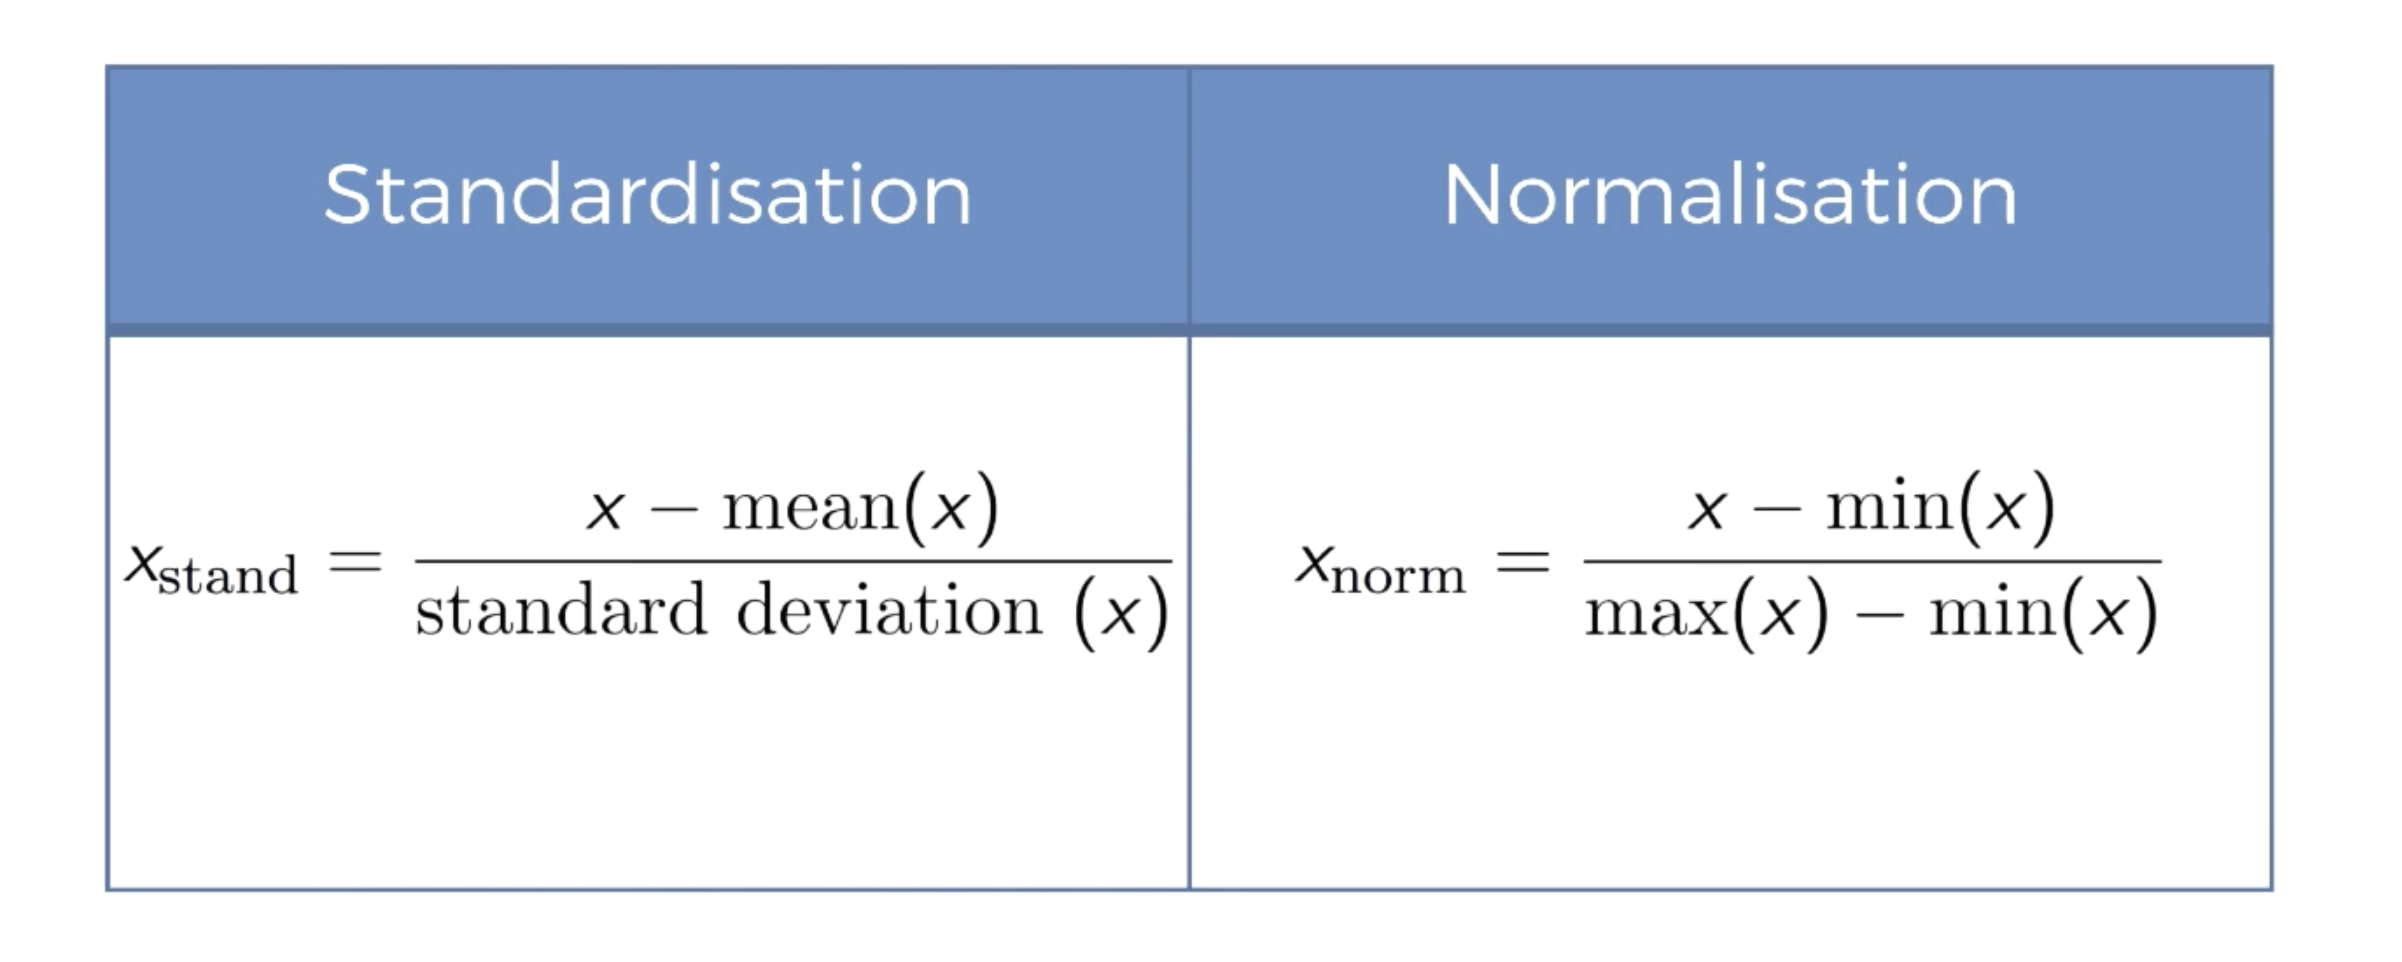

Standardisation usually give values between -3 and +3 (or -2 and +2, -1 and +1, etc.) while normalisation usually give values between 0 and 1.

The two common techniques used in feature scaling are standardisation and normalisation. Normalisation is usually the pick when most features follow a normal distribution while standardisation generally works all the time so between standardisation and normalisation, standardisation is the pick for this notebook. 

In [27]:
#StandardScaler class from preprocessing module
from sklearn.preprocessing import StandardScaler

In [28]:
#create an object of StandardScaler class
sc = StandardScaler()

In [29]:
#standardisation is not performed on the 3 dummy variables in the feature matrix
#because their values are already between -3 and +3. Standardisation will only make it worse,
#making these encodings lose their meanings/interpretations (nonsense numerical values)
#fit will calculate the mean and std, transform will apply the transformation/formula to all the values
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:]) #<- training data
#feature matrix of testing data is transformed using the same scaler applied on the training data
#use transform() instead of fit_transform()
X_test[:, 3:] = sc.transform(X_test[:, 3:]) 

In [30]:
print(X_train)

[[0.0 1.0 0.0 -0.5773502691896258 1.2909944487358056 -0.19159184384578545
  -1.0781259408412425]
 [0.0 1.0 0.0 1.7320508075688774 -0.7745966692414834
  -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 1.0 -0.5773502691896258 -0.7745966692414834 0.566708506533324
  0.633562432710455]
 [0.0 1.0 0.0 -0.5773502691896258 1.2909944487358056 -0.30453019390224867
  -0.30786617274297867]
 [0.0 1.0 0.0 -0.5773502691896258 1.2909944487358056 -1.9018011447007988
  -1.420463615551582]
 [1.0 0.0 1.0 -0.5773502691896258 -0.7745966692414834 1.1475343068237058
  1.232653363453549]
 [0.0 1.0 0.0 1.7320508075688774 -0.7745966692414834 1.4379472069688968
  1.5749910381638885]
 [1.0 0.0 1.0 -0.5773502691896258 -0.7745966692414834 -0.7401495441200351
  -0.5646194287757332]]


In [31]:
print(X_test)

[[0.0 1.0 0.0 1.7320508075688774 -0.7745966692414834 -1.4661817944830124
  -0.9069571034860727]
 [1.0 0.0 1.0 -0.5773502691896258 -0.7745966692414834
  -0.44973664397484414 0.2056403393225306]]
